# Compressing Data via Dimensionality Reduction	

## 1. Unsupervised dimensionality reduction via principal component analysis	

#### Total and explained variance


In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('../code/datasets/wine/wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#### Compute covariance matrix and eigenvectors 

In [5]:
import numpy as np  

In [6]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
        0.60181514,  0.52251546,  0.08414846,  0.33051429,  0.29595018,
        0.16831254,  0.21432212,  0.2399553 ])

In [7]:
total = np.sum(eigen_vals)
var_exp = [i/total for i in sorted(eigen_vals, reverse=True)] #explained variances
cum_var_exp = np.cumsum(var_exp)
var_exp[:3]

[0.37329647723490678, 0.18818926106599568, 0.10896790724757796]

In [8]:
import matplotlib.pylab as plt
%matplotlib inline

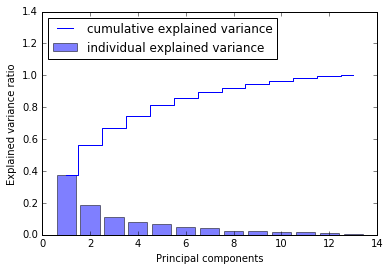

In [9]:
plt.bar(range(1,len(var_exp)+1),var_exp, alpha=0.5, 
        align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1),cum_var_exp,
        where='mid', label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.ylim([0,1.4])
plt.legend(loc='upper left')
plt.show()

#### Feature transformation	

In [10]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [11]:
# experiment of sort behavior
a = [(2,1),(3,2),(2,4),(7,3)]
a.sort(reverse=True)
print a

[(7, 3), (3, 2), (2, 4), (2, 1)]


In [12]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis]))
print "Matrix W (projection matrix):\n",w

Matrix W (projection matrix):
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [13]:
print X_train_std.shape, w.shape
X_train_pca =  X_train_std.dot(w)
X_train_pca.shape

(124, 13) (13, 2)


(124, 2)

In [14]:
# transform a sample onto the PCA subspace
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

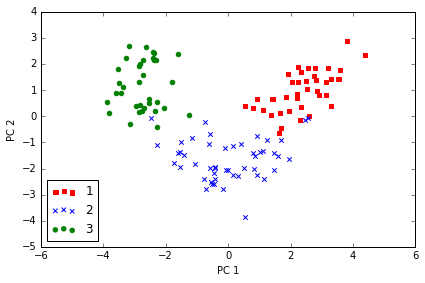

In [15]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1], color=c, marker=m, label=l)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

note: Although the class labels information is encoded for the purpose of illustration in the preceding scatter plot, we have to keep in mind that PCA is an unsupervised technique that doesn't use class label information.

#### Principal component analysis in scikit-learn	

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(8,5))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

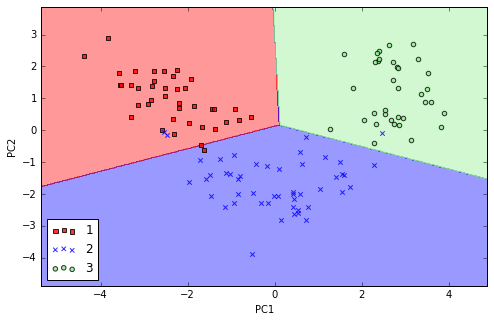

In [18]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

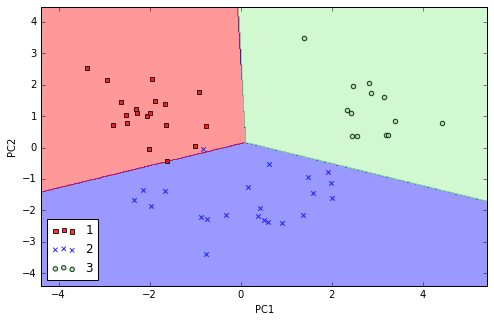

In [19]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [20]:
# calculating explained variance ratios
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
print pca.explained_variance_ratio_
print np.cumsum(pca.explained_variance_ratio_)

[ 0.37329648  0.18818926  0.10896791  0.07724389  0.06478595  0.04592014
  0.03986936  0.02521914  0.02258181  0.01830924  0.01635336  0.01284271
  0.00642076]
[ 0.37329648  0.56148574  0.67045365  0.74769754  0.81248349  0.85840362
  0.89827298  0.92349212  0.94607393  0.96438317  0.98073654  0.99357924
  1.        ]


## 2. Supervised data compression via linear discriminant analysis	

#### Computing the scatter matrices	

Computing mean vectors

In [21]:
np.set_printoptions(precision=4)
# These options determine the way floating point numbers, arrays and 
# other NumPy objects are displayed.
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(
                    X_train_std[y_train==label],axis=0))
mean_vecs

[array([ 0.9259, -0.3091,  0.2592, -0.7989,  0.3039,  0.9608,  1.0515,
        -0.6306,  0.5354,  0.2209,  0.4855,  0.798 ,  1.2017]),
 array([-0.8727, -0.3854, -0.4437,  0.2481, -0.2409, -0.1059,  0.0187,
        -0.0164,  0.1095, -0.8796,  0.4392,  0.2776, -0.7016]),
 array([ 0.1637,  0.8929,  0.3249,  0.5658, -0.01  , -0.9499, -1.228 ,
         0.7436, -0.7652,  0.979 , -1.1698, -1.3007, -0.3912])]

Within-Class Scatter Matrix

In [22]:
d = 13 # number of features
S_W =  np.zeros((d,d))
for label,mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

Class labels in the training set is not uniformly distributed. So its better to compute the normalized version of the scatter matrix which is covariance matrix.

In [23]:
print 'Class label distribution: %s'%np.bincount(y_train)[1:]

Class label distribution: [40 49 35]


Covariance matrix

In [24]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

Between-class Scatter Matrix

$  \boldsymbol{S_b}  = \sum\limits_{i=1}^cN_i\boldsymbol{(m_i-m)(m_i-m)}^{T}$

In [25]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

#### Selecting linear discriminants for the new feature subspace	

Compute the matrix $ \boldsymbol{S_W^{-1}S_B}$

In [26]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))  

Sort eigenvalues in decsending order

In [27]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
for e in eigen_pairs:
    print e[0]

452.721581245
156.43636122
6.29861558094e-14
6.0882566973e-14
5.68434188608e-14
5.00970127324e-14
1.62888285062e-14
1.62888285062e-14
1.27604136115e-14
1.21605269177e-14
7.47931337016e-15
7.47931337016e-15
9.15717517221e-16


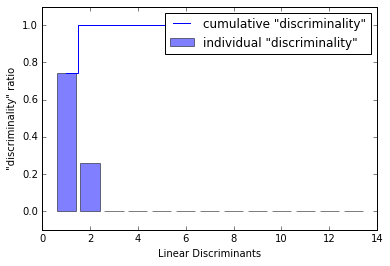

In [28]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=0.5, align='center', label='individual "discriminality"')
plt.step(range(1,14), cum_discr, where='mid', label='cumulative "discriminality"')
plt.xlabel('Linear Discriminants')
plt.ylabel('"discriminality" ratio')
plt.ylim([-0.1, 1.1])
plt.legend()
plt.show()

Transformation matrix W

In [29]:
w = np.hstack(( eigen_pairs[0][1][:,np.newaxis].real,
               eigen_pairs[1][1][:,np.newaxis].real))
w

array([[-0.0662, -0.3797],
       [ 0.0386, -0.2206],
       [-0.0217, -0.3816],
       [ 0.184 ,  0.3018],
       [-0.0034,  0.0141],
       [ 0.2326,  0.0234],
       [-0.7747,  0.1869],
       [-0.0811,  0.0696],
       [ 0.0875,  0.1796],
       [ 0.185 , -0.284 ],
       [-0.066 ,  0.2349],
       [-0.3805,  0.073 ],
       [-0.3285, -0.5971]])

#### Projecting samples onto the new feature space	

$X' = XW$

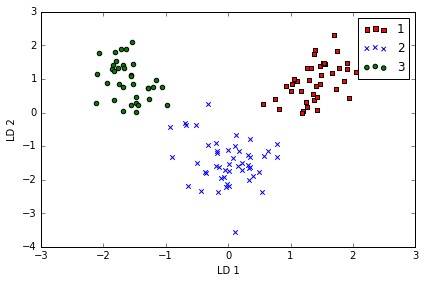

In [30]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### LDA via scikit-learn	

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [32]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

Run a logistic regression to see the effect

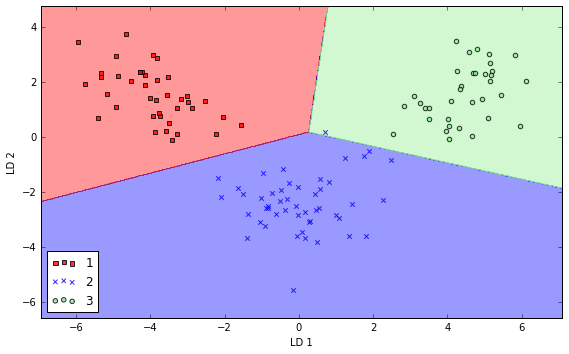

In [33]:
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

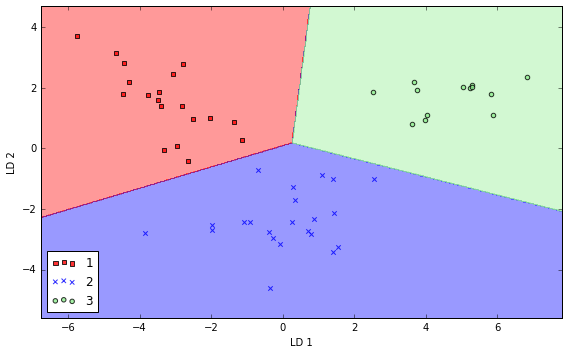

In [34]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## 3. Using kernel principal component analysis for nonlinear mappings	

#### Implementing a kernel principal component analysis in Python

In [35]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

In [53]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF Kernel Implemetation.
    
    Parameters
    ----------
    X: {Numpy ndrray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    --------
    X_pc: {Numpy ndarray}, shape = [n_samples,k_features]
        Projected dataset
        
    """
    # Calculate pairwise squared Euclidean distances
    # in MxN dimensional dataset.
    sq_dist = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dist = squareform(sq_dist)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma*mat_sq_dist)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order.
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    return X_pc

#### Example 1 – separating half-moon shapes	

In [48]:
import matplotlib.pylab as plt
from sklearn.datasets import make_moons
%matplotlib inline

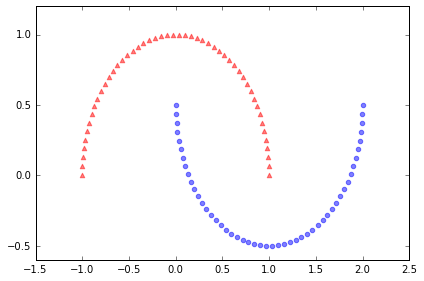

In [49]:
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

First, project the data onto principal components via standart PCA.

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

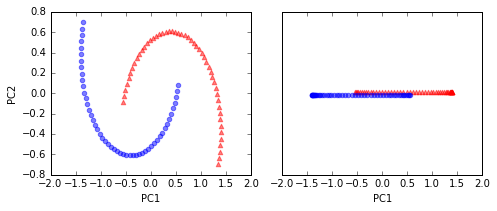

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

A linear classifier would be unable to perform well on the dataset transformed via standart PCA.
Lets try kernel PCA.

In [ ]:
from matplotlib.ticker import FormatStrFormatter

In [54]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

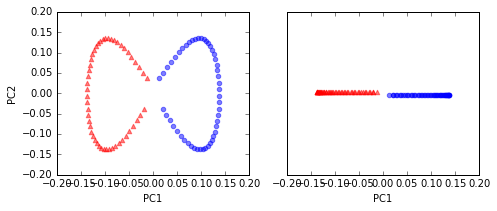

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

#### Example 2 – separating concentric circles

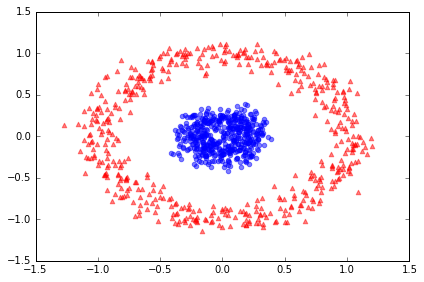

In [99]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y==0,0], X[y==0,1], 
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], 
            color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

Standart PCA approach:

In [ ]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

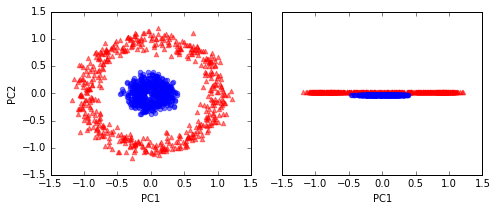

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_spca[y == 0,0],X_spca[y == 0,1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1,0],X_spca[y == 1,1],
              color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02, 
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

Again, standart PCA is not able to produce results suitable for training a linear classifier.

In [104]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

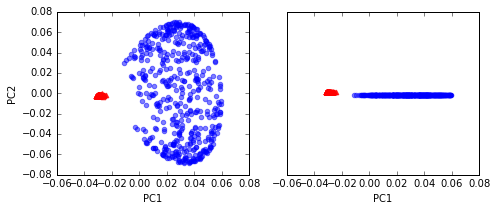

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

# The RBF kernel PCA projected the data onto new subspace where the two classes  become linearly seperable.

#### Projecting new data points	

In [162]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF Kernel Implemetation.
    
    Parameters
    ----------
    X: {Numpy ndrray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    --------
    X_pc: {Numpy ndarray}, shape = [n_samples,k_features]
        Projected dataset
    
    lambdas: list
        Eigenvalues
        
    """
    # Calculate pairwise squared Euclidean distances
    # in MxN dimensional dataset.
    sq_dist = pdist(X, 'sqeuclidean')
    
    # Convert pairwise distances into a square matrix.
    mat_sq_dist = squareform(sq_dist)
    
    # Compute the symmetric kernel matrix.
    K = exp(-gamma*mat_sq_dist)
    
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order.
    eigvals, eigvecs = eigh(K)
    
    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    # Collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1, n_components+1)]
    
    return alphas, lambdas

In [163]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas =rbf_kernel_pca(X, gamma=15, n_components=1)

In [173]:
x_new = X[25]
x_new

array([ 1.8713,  0.0093])

In [174]:
# original projection
x_proj = alphas[25]
x_proj

array([ 0.0788])

In [175]:
from __future__ import division

In [176]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma*pair_dist)
    return k.dot(alphas/lambdas)

In [177]:
# projection of new data point
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([ 0.0788])

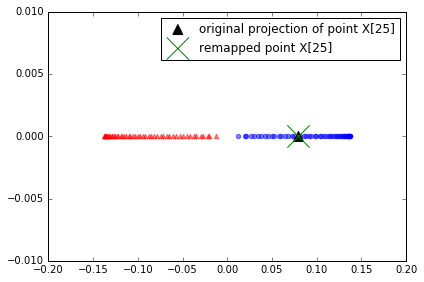

In [178]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)

plt.tight_layout()
plt.show()

The sample is correctly mapped onto the first principle component.

#### Kernel principal component analysis in scikit-learn	

In [183]:
from sklearn.decomposition import KernelPCA

In [185]:
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf' ,gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

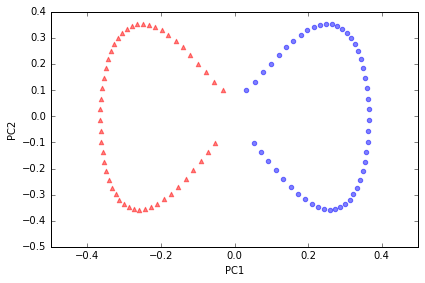

In [186]:
plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()